# Should you go partying or not? - A Principal Agent model 

Imports and set magics:

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm
import ipywidgets as widgets
import matplotlib.pyplot as plt
from types import SimpleNamespace

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# plotting
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

# local modules
from modelproject import PrincipalAgentClass


# Model description

The principal owns a Joe and the Juice and employs an employee (agent) to sell the juice. The agents utility function is given by $\frac{w^{1-\rho}}{1-\rho} - c \cdot e$, where w is the wage received, and $e=e^*=1$ when the employee stays home at night to be well-rested and $e=0$ when he goes partying. He has a reservation utility of $\bar{u}$ and it is seen how the agent is risk averse. 

The employee might sell lots of juice, $s_H$, and only a little juice, $s_L$. When the employee is hungover the probability of high juice sales is $\pi_0$. When the employee is not hungover, $e=e^*=1$ the probability is $\pi_1$.

The principal cannot observe whether to agent goes partying or stays at home, but he/she might construct a contract that induces the agent to provide high effort. 

In order to do this the principal can suggest a contract with a wage og $w_H$ if the employee sells a lot, and $w_L$ if the employee sells a little. The dilemma is again that the agent is risk-averse and the expected wage necessary in order to provide his reservation utility is higher when we introduce risk. 
 
The principal chooses $(w_L,w_H)$ so as to maximize expected profit:
$$\begin{align} profit = \pi_i \cdot (s_H-w_H) +(1-\pi_i)(s_L-w_L), i\in{(0,1)}
\end{align}$$

If the principal wants the agent to work hard the problem looks like the following:
$$ 
\begin{align*}
\min_{w_{H},w_{L}} \pi_1 \cdot w_H +(1-\pi_1)w_L \\
 \text{s.t.} \\
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \geq \bar{u} \quad \text{(IR)} \\
 
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \geq \pi_0 (\frac{w_H^{1-\rho}}{1-\rho})+(1-\pi_0)(\frac{w_L^{1-\rho}}{1-\rho}) \quad \text{(IC)}
\end{align*}


$$

The IC-constraint can be rewritten:
$$
\begin{align*}
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \geq \pi_0 (\frac{w_H^{1-\rho}}{1-\rho})+(1-\pi_0)(\frac{w_L^{1-\rho}}{1-\rho}) \Longleftrightarrow \\
(\pi_1-\pi_0)\frac{w_H^{1-\rho}}{1-\rho} - (\pi_1-\pi_0)\frac{w_L^{1-\rho}}{1-\rho} \geq c\cdot e^* \Longleftrightarrow \\
\frac{w_H^{1-\rho}}{1-\rho} - \frac{w_L^{1-\rho}}{1-\rho} \geq \frac {c \cdot e^*}{\pi_1-\pi_0}
\end{align*}

If the principal wants the agent to just go partying the problem looks like the following:
$$ 
\begin{align*}
\min_{w_{h},w_{L}} \pi_0 \cdot w_H +(1-\pi_0)w_L \\
 \text{s.t.} \\
 \pi_0 (\frac{w_H^{1-\rho}}{1-\rho}) + (1-\pi_0) (\frac{w_L^{1-\rho}}{1-\rho}) \geq \bar{u} \quad \text{(IR)} \\
 
 \pi_1 (\frac{w_H^{1-\rho}}{1-\rho} -c \cdot e^*) + (1-\pi_1) (\frac{w_L^{1-\rho}}{1-\rho} -c \cdot e^*) \leq \pi_0 (\frac{w_H^{1-\rho}}{1-\rho})+(1-\pi_0)(\frac{w_L^{1-\rho}}{1-\rho}) \quad \text{(IC)}
 
\end{align*}


$$

The IC-constraint can again be rewritten: 
$$
\begin{align*}
\frac{w_H^{1-\rho}}{1-\rho} - \frac{w_L^{1-\rho}}{1-\rho} \leq \frac {c \cdot e^*}{\pi_1-\pi_0}
\end{align*}

## Analytical solution

Firstly, we solve the model analytically when the principal wants high and low effort. We find the optimal wages expressed using only parameters from the model 

### Defining start set-up

In [2]:
# defining parameters
pi_1 = sm.symbols('pi_1')
pi_0 = sm.symbols('pi_0')
wH = sm.symbols('w_H')
wL = sm.symbols('w_L')
w = sm.symbols('w')
rho = sm.symbols('rho')
c = sm.symbols('c')
estar = sm.symbols('e^*')
ubar = sm.symbols('ubar')

In [3]:
# defining objective function
objective = pi_1*wH +(1-pi_1)*wL
objective

pi_1*w_H + w_L*(1 - pi_1)

In [4]:
# defining utility if recieving high wage
uH = wH**(1-rho)/(1-rho)
uH

w_H**(1 - rho)/(1 - rho)

In [5]:
# defining utility if recieving low wage
uL = wL**(1-rho)/(1-rho)
uL

w_L**(1 - rho)/(1 - rho)

### Solution if the principal wants high effort

If the principal wants high effort both the IR and the IC constraint will bind. This is used to solve for $w_H$ and $w_L$

In [6]:
# defining IR constraint. will bind in optimum. 
IRconstraint_high_effort = sm.Eq(pi_1*(uH-c*estar) + (1-pi_1)*(uL-c*estar),ubar)
IRconstraint_high_effort 

Eq(pi_1*(-c*e^* + w_H**(1 - rho)/(1 - rho)) + (1 - pi_1)*(-c*e^* + w_L**(1 - rho)/(1 - rho)), ubar)

In [7]:
# defining IC constraint. will bind in optimum. 
ICconstraint_high_effort = sm.Eq(uH-uL,c*estar/(pi_1-pi_0))
ICconstraint_high_effort

Eq(w_H**(1 - rho)/(1 - rho) - w_L**(1 - rho)/(1 - rho), c*e^*/(-pi_0 + pi_1))

**Solving for the optimal utilities**

In [8]:
# isolating uL from IR 
uL_from_IR_high_effort = sm.solve(IRconstraint_high_effort,uL)
uL_from_IR_high_effort[0]

(-c*e^**rho + c*e^* - pi_1*w_H**(1 - rho) - rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1)

In [9]:
# substitutig uL into IC
IC_subs_high_effort = ICconstraint_high_effort.subs(uL, uL_from_IR_high_effort[0])
IC_subs_high_effort

Eq(w_H**(1 - rho)/(1 - rho) - (-c*e^**rho + c*e^* - pi_1*w_H**(1 - rho) - rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1), c*e^*/(-pi_0 + pi_1))

In [10]:
# isolating uH
uH_from_IC_high_effort = sm.solve(IC_subs_high_effort, uH)
uH_from_IC_high_effort[0]

(-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*pi_1*w_H**(1 - rho) - pi_0*rho*ubar + pi_0*ubar + pi_1**2*w_H**(1 - rho) + pi_1*rho*ubar - pi_1*ubar)/(pi_0*pi_1*rho - pi_0*pi_1 - pi_0*rho + pi_0 - pi_1**2*rho + pi_1**2 + pi_1*rho - pi_1)

In [11]:
# substituting uH into IC 
IC_subs1_high_effort = ICconstraint_high_effort.subs(uH, uH_from_IC_high_effort[0])
IC_subs1_high_effort

Eq(-w_L**(1 - rho)/(1 - rho) + (-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*pi_1*w_H**(1 - rho) - pi_0*rho*ubar + pi_0*ubar + pi_1**2*w_H**(1 - rho) + pi_1*rho*ubar - pi_1*ubar)/(pi_0*pi_1*rho - pi_0*pi_1 - pi_0*rho + pi_0 - pi_1**2*rho + pi_1**2 + pi_1*rho - pi_1), c*e^*/(-pi_0 + pi_1))

In [12]:
# isolating uL
uL_from_IC_subs1_high_effort = sm.solve(IC_subs1_high_effort,uL)
uL_from_IC_subs1_high_effort[0]

(-c*e^**rho + c*e^* - pi_1*w_H**(1 - rho) - rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1)

**Solving for the optimal wages**

In [13]:
# solve for wH
wH_solve_high_effort = sm.solve(sm.Eq(uH_from_IC_high_effort[0],uH),wH)
wH_solve_high_effort[0]

((-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*rho*ubar + pi_0*ubar + pi_1*rho*ubar - pi_1*ubar)/(pi_0 - pi_1))**(-1/(rho - 1))

In [14]:
# solving for wL
wL_solve_high_effort = sm.solve(sm.Eq(uL_from_IC_subs1_high_effort[0],uL),wL)
wL_solve_high_effort[0]

((c*e^**rho**2 - 2*c*e^**rho + c*e^* + pi_1*rho*w_H**(1 - rho) - pi_1*w_H**(1 - rho) + rho**2*ubar - 2*rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1))**(-1/(rho - 1))

In [15]:
# defining wL without wH (only with parameters from the model)
wL_without_wages_high_effort = wL_solve_high_effort[0].subs(wH,wH_solve_high_effort[0])
wL_without_wages_high_effort

((c*e^**rho**2 - 2*c*e^**rho + c*e^* + pi_1*rho*(((-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*rho*ubar + pi_0*ubar + pi_1*rho*ubar - pi_1*ubar)/(pi_0 - pi_1))**(-1/(rho - 1)))**(1 - rho) - pi_1*(((-c*e^**pi_0*rho + c*e^**pi_0 + c*e^**rho - c*e^* - pi_0*rho*ubar + pi_0*ubar + pi_1*rho*ubar - pi_1*ubar)/(pi_0 - pi_1))**(-1/(rho - 1)))**(1 - rho) + rho**2*ubar - 2*rho*ubar + ubar)/(pi_1*rho - pi_1 - rho + 1))**(-1/(rho - 1))

**Turning the solutions into lambda functions**

In [16]:
# low wage
wL_func_high_effort = sm.lambdify(args=(pi_1,pi_0,rho,c,estar,ubar), expr=wL_without_wages_high_effort)

In [17]:
# high wage 
wH_func_high_effort = sm.lambdify(args=(pi_1,pi_0,rho,c,estar,ubar), expr=wH_solve_high_effort)

### Solution if the principal wants low effort

If the principal wants low effort only the IR will bind, since you would not want to differentiate the wages, if you only want the agent to provide low effort (because the agent is risk-averse this is optimal).

Therefore $w_L=w_H=w$

In [18]:
IRconstraint_low_effort = sm.Eq(pi_1*w**(1-rho)/(1-rho) + (1-pi_1)*w**(1-rho)/(1-rho),ubar)
IRconstraint_low_effort 

Eq(pi_1*w**(1 - rho)/(1 - rho) + w**(1 - rho)*(1 - pi_1)/(1 - rho), ubar)

In [19]:
w_solve_low_effort = sm.solve(IRconstraint_low_effort ,w)
w_solve_low_effort[0]

(ubar*(1 - rho))**(-1/(rho - 1))

**Making the solution into lambda functions**

In [20]:
w_func_low_effort = sm.lambdify(args=(rho,ubar),expr=w_solve_low_effort)

## Numerical solution

We now provide an algorithm for solving the model:

**Algorithm on how to solve our economic model**

1. Solve for the optimal wages when wanting high effort using a numercal solver that can handle constraints. 

    a. Define the mathematical equations that represent the economic model, including the expected wages and IC- and IR- constraints related to high effort.

    b. Set the initial guesses for the wages.

    c. Use a numerical solver to minimize expected wages while satisfying the constraints

2. Solve for the optimal wages when wanting low effort using a numercal solver that can handle constraints.

    a. Define the mathematical equations that represent the economic model, including the expected wages and IC- and IR- constraints related to low effort.

    b. Set the initial guesses for the wages.

    c. Use a numerical solver to minimize expected wages while satisfying the constraints

3. Compare high effort profit and low effort profit 

    a. Evaluate profits by plugging in wages in the profit function
    
    b. Determine which solutions yields the highest profit. This is the final solution

We now solve the model and compare the profits when wanting high effort and low effort

In [21]:
model = PrincipalAgentClass()
par = model.par
sol = model.sol

In [22]:
model.solve()

(12.250000000000002, 3.361111111111069, True, 145.41666666666669)

In [23]:
print(f'The high sales wage when wanting high effort is {sol.wH_high_effort:.2f}')
print(f'The low sales wage when wanting high effort is {sol.wL_high_effort:.2f}')
print(f'The resulting profit when wanting high effort is {sol.profit_high_effort:.2f}')


The high sales wage when wanting high effort is 12.25
The low sales wage when wanting high effort is 3.36
The resulting profit when wanting high effort is 145.42


In [24]:
print(f'The high sales wage when wanting low effort is {sol.wH_loweffort:.2f}')
print(f'The low sales wage when wanting low effort is {sol.wL_loweffort:.2f}')
print(f'The resulting profit when wanting low effort is {sol.profit_low_effort:.2f}')

The high sales wage when wanting low effort is 6.25
The low sales wage when wanting low effort is 6.25
The resulting profit when wanting low effort is 103.75


It is seen how it is in this case optimal to construct the contract so that the agent works hard. Furthermore it is again seen how you provide the same wage when getting high and low sales, when the principal only wants low effort. 

**Checking differences between numerical and analytical solutions wanting high effort and differing $\bar{u}$**

We now check the differences between the analytical and numerical solution (which should be equal). This also works as an simulation of the model, since I find the solution for different reservation utility, $\bar{u}$, levels

In [28]:
# making vectors to store the results
analytical_high_effort = SimpleNamespace()
numerical_high_effort = SimpleNamespace()

namespaces = [analytical_high_effort, numerical_high_effort]

variables = ["wH", "wL", "IR","IC"]

steps = 20
grid = np.linspace(2,10,steps)

for ns in namespaces:
    for var in variables:
        setattr(ns, f"{var}_u", np.nan + np.zeros(steps))
        setattr(ns, f"{var}_u", np.nan + np.zeros(steps))


In [30]:
# solving the model for different reservation utilities bot numerically and analytically
for i,u in enumerate(grid):
    par.ubar = u
    model.solve()
    
    # storing wages
    numerical_high_effort.wH_u[i] = sol.wH_high_effort
    analytical_high_effort.wH_u[i] = wH_func_high_effort(par.pi_1,par.pi_0,par.rho,par.c,1,par.ubar)[0]
    
    numerical_high_effort.wL_u[i] = sol.wL_high_effort
    analytical_high_effort.wL_u[i] = wL_func_high_effort(par.pi_1,par.pi_0,par.rho,par.c,1,par.ubar)

    # storing constraints
    numerical_high_effort.IR_u[i] = model.IR_constraint(sol.wH_high_effort,sol.wL_high_effort,1)
    analytical_high_effort.IR_u[i] = model.IR_constraint(analytical_high_effort.wH_u[i], analytical_high_effort.wL_u[i], 1)
    
    numerical_high_effort.IC_u[i] = model.IC_constraint(sol.wH_high_effort,sol.wL_high_effort,1)
    analytical_high_effort.IC_u[i] = model.IC_constraint(analytical_high_effort.wH_u[i],analytical_high_effort.wL_u[i],1)

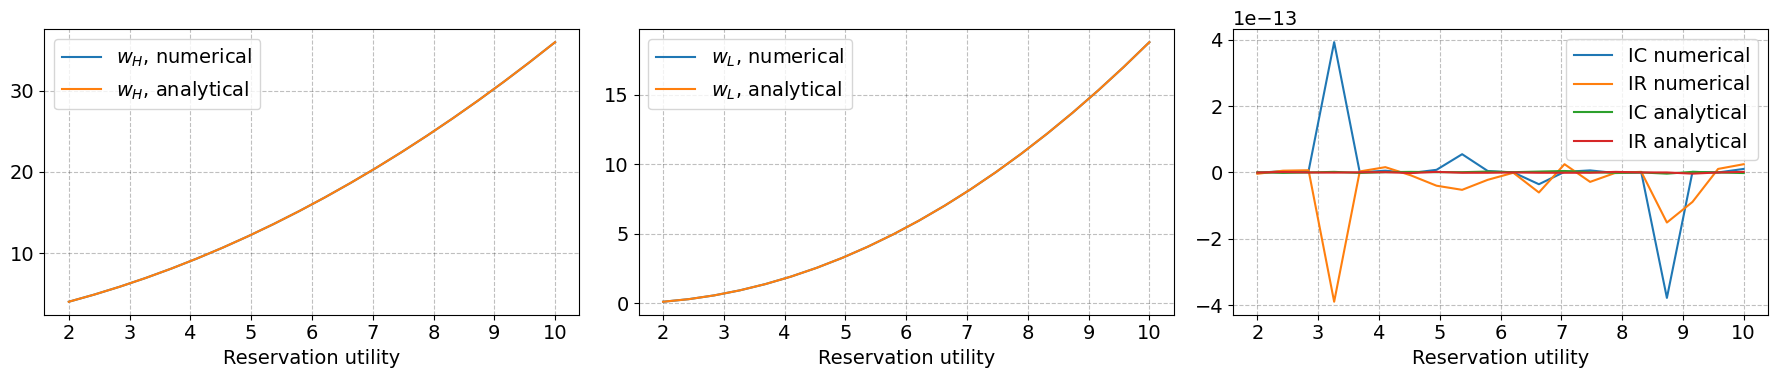

In [31]:
fig = plt.figure(figsize=(3*6, 6/1.5))

# plotting high wages as a function of reservation utility
ax = fig.add_subplot(1,3,1)
ax.plot(grid,numerical_high_effort.wH_u,label=r'$w_H$, numerical')
ax.plot(grid,analytical_high_effort.wH_u,label=r'$w_H$, analytical')
ax.set(xlabel ='Reservation utility')
ax.legend(frameon=True)

# plotting low wages as a function of reservation utility
ax = fig.add_subplot(1,3,2)
ax.plot(grid,numerical_high_effort.wL_u,label=r'$w_L$, numerical')
ax.plot(grid,analytical_high_effort.wL_u, label=r'$w_L$, analytical')
ax.set(xlabel ='Reservation utility')
ax.legend(frameon=True)

# plotting constraints as a function of reservation utility
ax = fig.add_subplot(1,3,3)
ax.plot(grid,numerical_high_effort.IC_u,label=r'IC numerical')
ax.plot(grid,numerical_high_effort.IR_u, label=r'IR numerical')
ax.plot(grid,analytical_high_effort.IC_u,label=r'IC analytical')
ax.plot(grid,analytical_high_effort.IR_u, label=r'IR analytical')
ax.set(xlabel ='Reservation utility')
ax.legend(frameon=True)


fig.tight_layout()


It is seen how the numerical and analytical method produce similar results and the the IC and IR constraints bind.

# Further analysis

### Solution with change of parameter values 

We now try to see how our model changes with parameter values.

**Probability of high sales if hard work, $\pi_1$**

In [32]:
# making plots with solutions for different levels of pi_1
def plot_pi_1(pi_0=0.3, ubar=5.0, rho=0.5, highsales=100, c=2, lowsales=0):
    model = PrincipalAgentClass()
    par = model.par 

    par.pi_0 = pi_0
    par.c = c
    par.ubar = ubar 
    par.rho = rho
    par.highsales = highsales 
    par.lowsales = lowsales 

    model.compare('pi_1',par.pi_0,1,20)

In [37]:
# making interactive plots
def plot_interact_pi1():
    widgets.interact(plot_pi_1,
                     pi_0 = widgets.FloatSlider(
                        desciption = 'pi_0', min=0, max=1, step=0.1, value=0.1),
                     ubar = widgets.FloatSlider(
                        description = 'ubar', min=0, max=20, step=1, value=2),
                     rho = widgets.FloatSlider(
                        description = 'rho', min=0, max=0.99, step=0.1, value=0.5),
                     highsales = widgets.FloatSlider(
                        description = 'sH', min= 0, max=200, step=5, value=100),
                     lowsales = widgets.FloatSlider(
                        description = 'sL', min=0, max=200, step=5, value=50),
                     c = widgets.FloatSlider(
                        description = 'c', min=1, max=20, step=1, value=2)
                     
);

In [38]:
plot_interact_pi1()

interactive(children=(FloatSlider(value=0.1, description='pi_0', max=1.0), FloatSlider(value=2.0, description=…

It it seen how the profits rise when $\pi_1$ rises, when the principal induces high effort. It is again also illustrated how the wages only differentiate, when high effort-profits are higher than low effort-profits.

**Cost of effort, C**

In [45]:
# making plots with solutions for different levels of c
def plot_c(pi_0=0.3, ubar=5.0, rho=0.5, highsales=100, pi_1 = 0.7, lowsales=0):
    model = PrincipalAgentClass()
    par = model.par 

    par.pi_0 = pi_0
    par.ubar = ubar 
    par.rho = rho
    par.highsales = highsales 
    par.lowsales = lowsales 
    par.pi_1 = pi_1

    model.compare('c',0,1,20)

In [46]:
# making interactive plots
def plot_interact_c():
    widgets.interact(plot_c,
                     pi_0 = widgets.FloatSlider(
                        desciption = 'pi_0', min=0, max=1, step=0.1, value=0.1),
                     ubar = widgets.FloatSlider(
                        description = 'ubar', min=0, max=20, step=1, value=2),
                     rho = widgets.FloatSlider(
                        description = 'rho', min=0, max=0.99, step=0.1, value=0.5),
                     lowsales = widgets.FloatSlider(
                        description = 'sL', min=0, max=200, step=5, value=50),
                     highsales = widgets.FloatSlider(
                        description = 'sH', min=0, max=200, step=5, value=75),
                     pi_1 = widgets.FloatSlider(
                        description = 'pi_1', min=0, max=1, step=0.1, value=0.2)
                     
);

In [41]:
plot_interact_c()

interactive(children=(FloatSlider(value=0.1, description='pi_0', max=1.0), FloatSlider(value=2.0, description=…

It is seen how the difference between high and low wage needs to rise, when the cost of providing high effort rises. Furthermore it is seen how profits are lower the higher c is. 

**Reservation utility, $\bar{u}$**

In [42]:
# making plots with solutions for different levels of ubar
def plot_u(pi_0=0.3, c=1, rho=0.5, highsales=100, pi_1 =0.7, lowsales=0):
    model = PrincipalAgentClass()
    par = model.par 

    par.pi_0 = pi_0
    par.c = c 
    par.rho = rho
    par.highsales = highsales 
    par.lowsales = lowsales 
    par.pi_1 = pi_1

    model.compare('ubar',0,20,20)

In [47]:
# making interactive plots
def plot_interact_u():
    widgets.interact(plot_u,
                     pi_0 = widgets.FloatSlider(
                        desciption = 'pi_0', min=0, max=1, step=0.1, value=0.1),
                     c = widgets.FloatSlider(
                        description = 'c', min=0, max=20, step=1, value=1),
                     rho = widgets.FloatSlider(
                        description = 'rho', min=0, max=0.99, step=0.1, value=0.5),
                     highsales = widgets.FloatSlider(
                        description = 'sH', min=0, max=200, step=5, value=100),
                     lowsales = widgets.FloatSlider(
                        description = 'sL', min=0, max=200, step=5, value=50),
                     pi_1 = widgets.FloatSlider(
                        description = 'pi_1', min=0, max=1, step=0.1, value=0.7)
                     
);

In [48]:
plot_interact_u()

interactive(children=(FloatSlider(value=0.1, description='pi_0', max=1.0), FloatSlider(value=1.0, description=…

It is seen how wages rise when the reservation utility rises, which makes sense since the agents outside option is better and we need higher wages to meet the IR-constraint. 

### Extension of the model, introducing monitoring that comes with a cost

We now extent the model by introducing a possibility for monitoring the agent's effort level but at a fixed cost. If the principal pays $M$ the IC constraints will not be there, since the principal can just demand an effort, and the problem will be solved without. The affected equations are 

$$\begin{align} profit = \pi_i \cdot (s_H-w_H) +(1-\pi_i)(s_L-w_L) - M\cdot monitoring, i\in{(0,1)}
\end{align}$$
where $monitoring$ is a dummy for whether the principal chooses to monitor or not.

Furthermore the IC constraints disappear.

In [ ]:
# solving the model with and without monitoring
model = PrincipalAgentClass()
no_monitor_wH, no_monitor_wL, no_monitor_effort, no_monitor_profit = model.solve()
monitor_wH, monitor_wL, monitor_effort, monitor_profit = model.solve(1)

In [ ]:
# printing results with monitoring
print(f'The high sales wage when monitoring is {no_monitor_wH:.2f}')
print(f'The low sales wage when monitoring is {no_monitor_wL:.2f}')
print(f'The principal wants high effort (1=True) {monitor_effort:.2f}')
print(f'The resulting profit when monitoring is {no_monitor_profit:.2f}')

In [ ]:
# printing results without monitoring
print(f'The high sales wage when not monitoring is {monitor_wH:.2f}')
print(f'The low sales wage when not monitoring is {monitor_wL:.2f}')
print(f'The principal demands high effort (1=True) {monitor_effort:.2f}')
print(f'The resulting profit when not monitoring is {monitor_profit:.2f}')

It is seen here how it is optimal to choose equal high and low wages when the principal is able to monitor, because the agent is risk averse. It is furthermore seen how it in this case yields a higher profit for the principal 

**Altering monitoring cost**

We now solve the model for different monitor costs:

In [ ]:
# making vectors to store the results
no_monitoring = SimpleNamespace()
monitoring = SimpleNamespace()
namespaces = [no_monitoring, monitoring]

variables = ["wH", "wL", "profit"]

steps = 20
grid = np.linspace(0.1,1,steps)

for ns in namespaces:
    for var in variables:
        setattr(ns, f"{var}", np.nan + np.zeros(steps))
        setattr(ns, f"{var}", np.nan + np.zeros(steps))

In [ ]:
# finding profits with and without monitoring with different monitor expenses
def plot_M():
    model = PrincipalAgentClass()
    par = model.par 
    sol = model.sol

    for i,M in enumerate(grid):
        par.M = M 
        model.solve()
        no_monitoring.profit[i] = sol.profit
        
    for i,M in enumerate(grid):
        par.M = M 
        model.solve(1)
        monitoring.profit[i] = sol.profit

    
    # plotting
    fig = plt.figure(figsize=(6,6/1.5))

    ax = fig.add_subplot(1,1,1)
    ax.set_title(f'Profits depending on M')
    ax.plot(grid,no_monitoring.profit,label='Profit, no monitoring')
    ax.plot(grid,monitoring.profit, label='Profit, monitoring')
    ax.set(xlabel =r'M')
    ax.legend(frameon=True)
    fig.tight_layout()
    plt.show()

In [ ]:
plot_M()

It is illustrated how the monitor cost is deciding for whether it is optimal for the principal to use the technology or not.

# Conclusion

In this project we have introduced a principal-agent model. First we solved it analytially and numerical and furthermore we showed how the numerical solver provides nearly identical solutions to the analytical solution. Afterwards we illustate how the solution depends on the model's parameters and how it is sometime optimal for the agent to make sure the agent provides a high effort and sometimes not. At last we provide an extension of the model where we introduce the possibility of monitoring the agent but at a cost. It is shown that monitoring makes the principal offer the same wage in case of high and low sales and that whether monitoring is optimal depends on the monitoring cost. 